## Buiseness Problem Understanding

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [2]:
df=pd.read_excel("insurance.xlsx")
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


## Data Understanding

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [5]:
df.head(2)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55


## Data Preprocessing

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [7]:
df.duplicated().sum()

1

In [8]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,expenses
581,19,male,30.6,0,no,northwest,1639.56


In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df['children'].value_counts()

children
0    573
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [11]:
df['children'].nunique()

6

In [12]:
print(df['sex'].value_counts())
df['sex'].nunique()

sex
male      675
female    662
Name: count, dtype: int64


2

In [13]:
print(df['smoker'].value_counts())
df['smoker'].nunique()

smoker
no     1063
yes     274
Name: count, dtype: int64


2

In [14]:
print(df['region'].value_counts())
df['region'].nunique()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64


4

In [15]:
df.columns.tolist()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses']

In [16]:
continuous= ['age',  'bmi',  'expenses']
discrete_count=['children']
discrete_categorical=['sex','smoker','region']

In [17]:
df[discrete_categorical].describe()

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


In [18]:
df[continuous].corr()

,age,bmi,expenses
age,1.000000,0.109414,0.298308
bmi,0.109414,1.000000,0.198637
expenses,0.298308,0.198637,1.000000


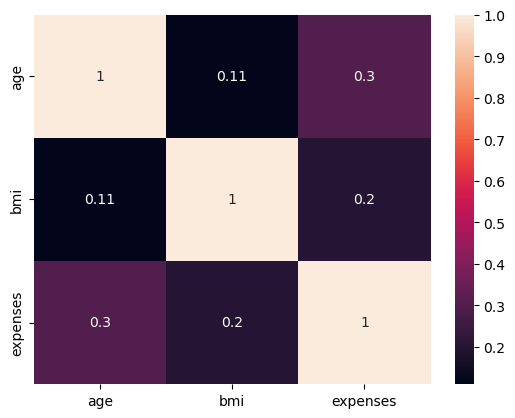

In [19]:
sns.heatmap(df[continuous].corr(),annot=True)
plt.show()

In [20]:
df.drop('region',axis=1,inplace=True)
df.head()

,age,sex,bmi,children,smoker,expenses
0,19,female,27.9,0,yes,16884.92
1,18,male,33.8,1,no,1725.55
2,28,male,33.0,3,no,4449.46
3,33,male,22.7,0,no,21984.47
4,32,male,28.9,0,no,3866.86


In [21]:
df['sex'].replace({'female':[0],'male':[1]},inplace=True)
df['smoker'].replace({'no':[0],'yes':[1]},inplace=True)

In [22]:
df.head()

,age,sex,bmi,children,smoker,expenses
0,19,0,27.9,0,1,16884.92
1,18,1,33.8,1,0,1725.55
2,28,1,33.0,3,0,4449.46
3,33,1,22.7,0,0,21984.47
4,32,1,28.9,0,0,3866.86


In [23]:
X=df.drop('expenses',axis=1)
y=df['expenses']

#### Train-Test-Split

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=9)

## Modelling & Evaluation

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
estimator=Ridge()
param_grid={'alpha':list(range(1,100))}
model_hp=GridSearchCV(estimator,param_grid,cv=5,scoring='r2')
model_hp.fit(X_train,y_train)
alpha=model_hp.best_params_
a=alpha['alpha']
a

1

In [26]:

# X=df.drop('sex',axis=1)
X=df.drop('expenses',axis=1)
y=df['expenses']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=9)

from sklearn.linear_model import Ridge
best_model=Ridge(alpha=a)

best_model.fit(X_train,y_train)

print(f"Intercept {best_model.intercept_}")
print(f"Coefficient {best_model.coef_}")

ypred_train=best_model.predict(X_train)
ypred_test=best_model.predict(X_test)

from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

print(f"Train R2 score is {r2_score(y_train,ypred_train)}")
print(f"CV score is {(cross_val_score(best_model,X_train,y_train,cv=5)).mean()}")
print(f"Test R2 score is {r2_score(y_test,ypred_test)}")

Intercept -12131.383174500288
Coefficient [  264.4786592   -112.37962155   318.56350557   413.12069122
 23853.85951773]
Train R2 score is 0.7593639632162803
CV score is 0.753470595394454
Test R2 score is 0.7008629672692221


## Prediction on Unseen Data

In [27]:
input_data1={"age":35,
           "sex":"Male",
           "bmi":31.4,
           "children":5,
           "smoker":"yes",
           "region":"southeast"}

input_data2={"age":31,
           "sex":"Female",
           "bmi":25.74,
           "children":0,
           "smoker":"no",
           "region":"northeast"}

In [28]:
df_test1=pd.DataFrame(input_data1,index=[0])
df_test1

,age,sex,bmi,children,smoker,region
0,35,Male,31.4,5,yes,southeast


In [29]:
df_test2=pd.DataFrame(input_data2,index=[0])
df_test2

,age,sex,bmi,children,smoker,region
0,31,Female,25.74,0,no,northeast


In [30]:
df_test1.drop(['region'],axis=1,inplace=True)
df_test1['smoker'].replace({"no":0,"yes":1},inplace=True)
df_test1['sex'].replace({"Female":0,"Male":1},inplace=True)
df_test1

,age,sex,bmi,children,smoker
0,35,1,31.4,5,1


In [31]:
best_model.predict(df_test1)

array([32935.34732475])

In [32]:
df_test2.drop(['region'],axis=1,inplace=True)
df_test2['smoker'].replace({"no":0,"yes":1},inplace=True)
df_test2['sex'].replace({"Female":0,"Male":1},inplace=True)
df_test2
df_test2

,age,sex,bmi,children,smoker
0,31,0,25.74,0,0


In [33]:
best_model.predict(df_test2)

array([4267.27989412])

## Conclusion

### Model Performance
- The **Train R² Score**: **0.7594** indicates that the Ridge Regression model explains approximately **75.94%** of the variance in the training data.
- The **Cross-Validation (CV) Score**: **0.7535** suggests that the model maintains good generalizability across different subsets of the data.
- The **Test R² Score**: **0.7009** implies that the model captures around **70.09%** of the variance in unseen data, which is a decent performance.

### Key Takeaways
- The model performs well, with a small gap between training and test scores, suggesting minimal overfitting.
- Ridge Regression proved to be effective in handling multicollinearity while maintaining predictive accuracy.


Overall, the Ridge Regression model provides a reliable predictive framework for the given dataset, balancing bias and variance effectively.
